<font size="12">Confusion Matrix Visualization</font>

In machine learning a confusion matrix is a kind of a table that is used to understand how well our classification model predictions perform, typically a supervised learning. It helps us a lot in understanding the model behavior and interpreting the results.  

In this notebook we will not discuss how to interpret a confusion matrix, that could be find [here](https://en.wikipedia.org/wiki/Confusion_matrix). Instead, we will present several ways of how to visualize a confusion matrix.

#### Axes convention
In the literature, we can find two variants for representing the samples in a confusion matrix:
1. each row of the matrix represents samples in an *actual* class, and each column represents samples in a *predicted* class
2. in the other variant, this arrangement is reversed 

In this notebook we will use the first variant (Sklearn representation), where *actual* labels are on the horizontal axes and *predicted* labels on the vertical axes, with the default parameter `labels=[0,1]`, meaning TN (True Negatrive) is at the top left corner.

<img src="images/cm_convention_table.png">

#### Topics
Some of the topics covered in this notebook:  

- normalized vs. unnormalized matrix
- confusion matrix arrays 
- confusion matrix dataframes, side by side
- plotting:
  - single confusion matrix heatmap
  - unnormalized and normalized heatmaps, side by side
  - multiple (two and more) confusion matrices, in two columns
  - using Sankey diagram



# Dependencies

In [1]:
import numpy as np
import os

# Classification metrics
from sklearn.metrics import confusion_matrix 

**Plotly dependencies**

In [2]:
from plotly import graph_objects as go

# Set the appropriate renderer in Jupyter Lab to allow Plotly displays figure correctly
# Set the default renderer explicitly as iframe 
import plotly.io as pio
pio.renderers.default = 'iframe' 

# If multiple notebooks are using 'iframe', set different 'html_directory' for each notebook
iframe_renderer = pio.renderers['iframe']
iframe_renderer.html_directory='iframe_figures_n2'

## Helper Functions

To help us with visualizations, we will import the script `metrics_utilities`. It is a collection of several helper functions:

- cm_cr - display unnormalized and normalized confusion matrix dataframes side by side, and classification report 
- plot_cm - plot unnormalized or normalized confusion matrix heatmap
- plot_cm_unnorm_and_norm - one model's confusion matrix heatmaps without and with normalization, side by side
- plot_conf_matrices - plot heatmaps for normalized (default) or unnormalized confusion matrices for multiple models
- plot_cm_sankey - interactive confusion matrix using Sankey diagram


In [3]:
# Import the script from different folder
import sys  
sys.path.append('./scripts')

import metrics_utilities as mu

# Preparing Data

The data used in this notebook is a result from one of my previous projects - [Bank-Churn-Prediction](https://github.com/zunicd/Bank-Churn-Prediction). <br>
I saved the true labels and predictions in `.npy` format and in the next two cells we will load them.

## Load Test True (Actual) Labels

In [4]:
# True labels
y_test = np.load('./data/y_test.npy')

## Load Predictions

In [5]:
# Prepare predictions for our models
pred_dt = np.load('./data/pred_dt.npy')
pred_dl = np.load('./data/pred_dl.npy')
pred_knn = np.load('./data/pred_knn.npy')
pred_lr = np.load('./data/pred_lr.npy')
pred_rf = np.load('./data/pred_rf.npy')
pred_svm = np.load('./data/pred_svm.npy')
pred_xgb = np.load('./data/pred_xgb.npy')


## Create *models - predictions* Dictionaries

We are going to create the dictionaries to map names of models to their predictions. <br> 
We will be using them later for plotting and displaying results of the models.

All models

In [6]:
# Create models_pred dictionary, contains all 7 models
models_pred = {
    'Decision Tree' : pred_dt,
    'Deep Learning' : pred_dl,
    'K-nearest Neighbors' : pred_knn,
    'Logistic Regression' : pred_lr,
    'Random Forest' : pred_rf,
    'SVM' : pred_svm,
    'XGBoost' : pred_xgb
}

Two models only

In [7]:
# Create models_pred_2 dictionary, contains 2 models
models_pred_2 = {
    'Decision Tree' : pred_dt,
    'Random Forest' : pred_rf
}

## Names of Classes

The `target_names` variable holds names of our classes. It will be used later for displaying evaluation results.

In [8]:
# Names of our classes
target_names = ['Stays', 'Exits']

# Confusion Matrix

## Why Normalized Confusion Matrix?

Most of real-life data is imbalanced, so using a confusion matrix without normalization might lead to improper conclusions.  
In the rest of this notebook, we could see the prove of that.

The simplest way to display a confusion matrix is as raw numbers in an array.

**Unnormalized Confusion Matrix**

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, pred_dt)
print(cm)

[[1979  410]
 [ 198  413]]


**Normalized Confusion Matrix**

Few points to know:
1. to calculate normalized version, divide each row element by the sum of the entire row
2. each row represents the total number of true (actual) values for each class label 
3. the normalized matrix will show % prediction of each class made by the model for that specific true (actual) label

In [10]:
# Normalized confusion matrix
cmn = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cmn)

[[0.83 0.17]
 [0.32 0.68]]


We can display both matrices by using 2 `print` commands, or using the separator argument like below:

In [11]:
# Normalized confusion matrix
cmn = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm, cmn, sep='\n\n')

[[1979  410]
 [ 198  413]]

[[0.83 0.17]
 [0.32 0.68]]


It does not look very appealing, and this is a binary class example.  
Just imagine a multi-class classification. It would be really tough to interpret and draw conclusions from.

I think we could do better.

## Display Confusion Matrix Dataframes Side by Side - `cm_cr`

We can display a confusion matrix as a dataframe, and display both, unnormalized and normalized, matrices side by side.  
For that we will utilize `cm_cr` function.  
We can also decide if want to print classification report.


**REQUIREMENTS:**
- pandas.Styler requires jinja2, use conda or pip to install it
- Pandas 1.3.0+ for `precision` in [Styler.format](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.format.html)

To call this function:  
`mu.cm_cr(model_name, y_test, y_pred, target_names, cr=True)`

<pre>Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of class names
        cr: print classification report if True - default

Returns:
        Display confusion matrix dataframes side by side
        and classification report if selected (default)</pre>

### One Model

#### Confusion Matrices Only

To display confusion matrices only, we will use `cr=False`

In [12]:
mu.cm_cr('Random Forest', y_test, pred_rf, target_names, cr=False)

                       Random Forest


PREDICTED,Stays,Exits
ACTUAL,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
ACTUAL,,
Stays,0.89,0.11
Exits,0.38,0.62


#### Confusion Matrix and Classification Report

If we do not enter the value for `cr` or we enter `cr=True`, classification report will be printed.

In [13]:
mu.cm_cr('Random Forest', y_test, pred_rf, target_names)

                       Random Forest


PREDICTED,Stays,Exits
ACTUAL,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
ACTUAL,,
Stays,0.89,0.11
Exits,0.38,0.62



              precision    recall  f1-score   support

       Stays       0.90      0.89      0.90      2389
       Exits       0.60      0.62      0.61       611

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.84      0.84      0.84      3000




### Multiple Models

We can create a dictionary to map model's names to their predictions.  
Running the function `cm_cr` in each iteration, will print confusion matrices and classification report (if `cm=True`) for all models.

In [14]:
# Display classification report and confusion matrix for multiple models 
#  models_pred_2 dictionary
for model, pred in models_pred_2.items():
    mu.cm_cr(model, y_test, pred, target_names)

                       Decision Tree


PREDICTED,Stays,Exits
ACTUAL,,
Stays,1979,410
Exits,198,413
PREDICTED,Stays,Exits
ACTUAL,,
Stays,0.83,0.17
Exits,0.32,0.68



              precision    recall  f1-score   support

       Stays       0.91      0.83      0.87      2389
       Exits       0.50      0.68      0.58       611

    accuracy                           0.80      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.80      0.81      3000


                       Random Forest


PREDICTED,Stays,Exits
ACTUAL,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
ACTUAL,,
Stays,0.89,0.11
Exits,0.38,0.62



              precision    recall  f1-score   support

       Stays       0.90      0.89      0.90      2389
       Exits       0.60      0.62      0.61       611

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.84      0.84      0.84      3000




## Plot Confusion Matrix Heatmaps for One Model - `plot_cm`

Let's use Seaborn `heatmap` to plot a confusion matrix for one model.  
The helper function `plot_cm` will help us with that.

To call this function:  
`mu.plot_cm(model_name, y_test, y_pred, target_names, color, norm=True)`

<pre>Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of class names
        color: color palette
        norm: plot normalized matrix if True - default 
              plot unnormalized matrix if False

    Returns:
        Plot one model's confusion matrix,
         normalized (default) or unnormalized</pre>

### Unnormalized Matrix

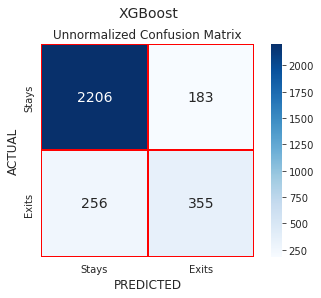

In [15]:
mu.plot_cm('XGBoost', y_test, pred_xgb, target_names, "Blues", norm=False)

### Normalized Matrix

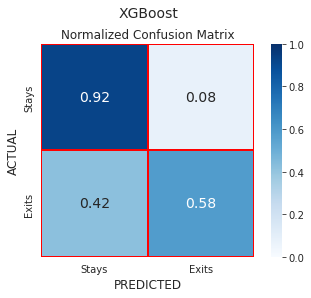

In [16]:
mu.plot_cm('XGBoost', y_test, pred_xgb, target_names, "Blues", norm=True)

## Unnormalized and Normalized Confusion Matrix Heatmaps Side by Side - `plot_cm_unnorm_and_norm`

We can utilize the function `plot_cm_unnorm_and_norm` to plot those two matrices from previous two cells, side by side.

To run this function:  
`mu.plot_cm_unnorm_and_norm(model_name, y_test, y_pred, target_names, color)`

<pre>Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of class names
        color: color palette

    Returns:
        Plot one model's confusion matrix heatmaps side by side
        left unnormalized and right normalized</pre>

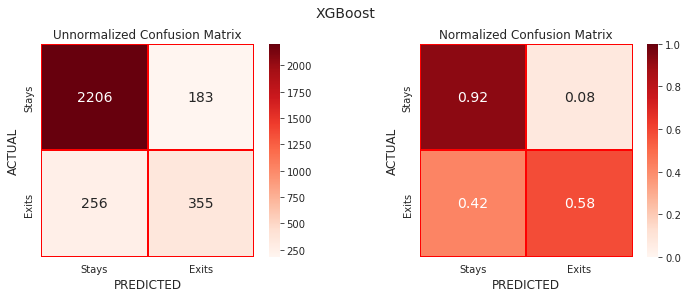

In [17]:
# Plot confusion matrix and its normalized version.
mu.plot_cm_unnorm_and_norm('XGBoost', y_test, pred_xgb, target_names, 'Reds')

## Confusion Matrix Heatmaps for Multiple Models - `plot_conf_matrices`

To compare confusion matrices for all our models in one plot, we can utilize the function `plot_conf_matrices`.

To run this function:     
`mu.plot_conf_matrices(models_pred, y_test, target_names, color, norm=True)`

<pre>Args:
    models_pred: dictionary with model names as keys and predictions as values 
    y_test: test target variable
    target_names: list of class names
    color: color palette
    norm: plot normalized matrices if True - default 
          plot unnormalized matrices if False

Returns:
    Plot all model's confusion matrix heatmaps, in 2 columns,
    normalized (default) or unnormalized<pre>

### Two Models - Normalized Connfusion Matrices

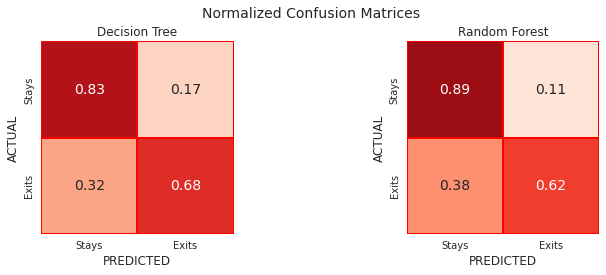

In [18]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred_2, y_test, target_names, 'Reds')

### Two Models - Unnormalized Confusion Matrices

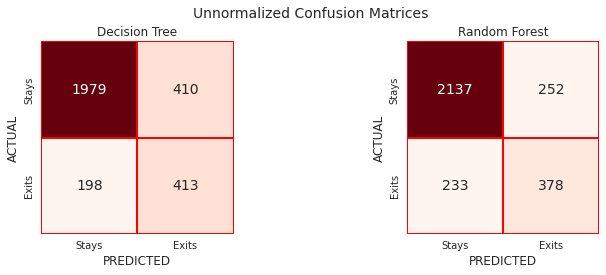

In [19]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred_2, y_test, target_names, 'Reds', norm=False)

### All Models

And finally, let's plot confusion matrices for all models.

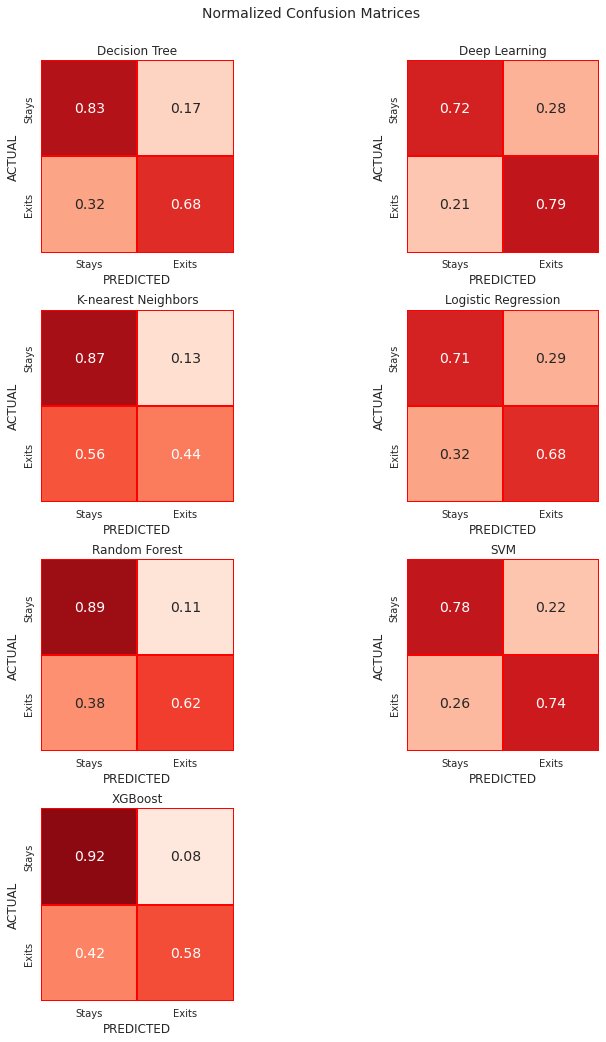

In [20]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred, y_test, target_names, 'Reds')

<br>  

**NOTE 1:**  

- in matplotlib >3.5.2 `dpi` default value was changed from 72 to 100
- deafult `figsize` was also changed: 6.0, 4.0 &rarr; 6.4, 4.8
- in our functions we used `dpi=72` and `figsize=(6.0, 4.0)` to make plots smaller 

**NOTE 2:**  
- the examples in this notebook are for binary classification
- for multi-class classification, with many classes, some adjusstments might be needed in helper functions
- increasing `dpi` above 72 might be sufficient

## Sankey Diagram

To dispiay a confusion matrix on an interactive and more elgant way, we will use **Sankey diagram**. 
By hovering over the diagram we can easily interpret the number of samples for each class (nodes) and how they were classified (links).  
We will also include values from normalized confusion matrix, and by hovering over the links they will be displayed as percentages, for example:  

<pre>413 (68%) <b>Exits</b> samples correctly classified as <b>Exits</b></pre>

The notebook [Confusion Matrix as Sankey Diagram](Confusion%20Matrix%20as%20Sankey%20Diagram.ipynb) describes step-by-step creation of the below function `plot_cm_sankey`.

To run this function:     
`mu.plot_cm_sankey(model_name, y_test, y_pred, target_names=None)`

<pre>Args:
    model_name: name of the model
    y_test: test target variable
    y_pred: prediction
    target_names: list of class names

Returns:
    Plot Sankey diagram of confusion matrix</pre>
 

In [21]:
mu.plot_cm_sankey('Decision Tree', y_test, pred_dt, target_names)

### How to interprete our Sankey confusion matrix?

- source nodes (ACTUAL ...) are on the left and target nodes (PREDICTED ...) on the right
- the size of nodes is proportional to the number of samples that belongs to each node
- the width of the links between nodes is proportional to the flow (result of classification), ie. the number of samples classified correctly (green) or incorrectly (red)
- hovering over the nodes and links will display numerical and textual representation of our confusion matrix

### 3x3 Confusion Matrix

Let's see how this works for an 3x3 confusion matrix.

We will use data from my project [T2D-Predictions](https://github.com/zunicd/T2D-Predictions).

In [22]:
# Actual (True) labels
t2d_y_test = np.load('./data/t2d_y_test.npy')
# Prediction from random forest model
t2d_pred_rf = np.load('./data/t2d_pred_rf.npy')
# Classes
t2d_classes = ['no_diabetes', 'pre_diabetes', 'diabetes']

In [23]:
mu.plot_cm_sankey('Random Forest', t2d_y_test, t2d_pred_rf, t2d_classes)

Hover over the diagram to get more information about the confusion matrix. 

**NOTE 3:**   
- Depending on values in the confusion matrix, especially for multi-class classification, Plotly could display target nodes (PREDICTED labels) in a different order than source nodes (ACTUAL labels).  
But do not worry, all connected links will have correct width (values).

Let's compare it with the heatmap plot.

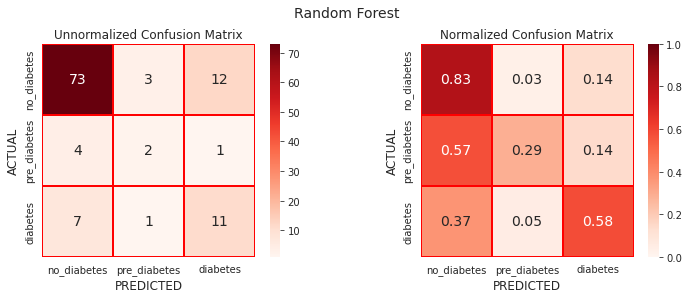

In [24]:
# Plot confusion matrix and its normalized version.
mu.plot_cm_unnorm_and_norm('Random Forest', t2d_y_test, t2d_pred_rf, t2d_classes, 'Reds')

<br>  

**NOTE 4 - for Jupyter Lab users:**  

-  Set the appropriate renderer in Jupyter Lab to allow Plotly displays figure correctly
- As suggested in the [Plotly documentation](https://plotly.com/python/renderers/#interactive-renderers), you might set the default renderer explicitly as iframe by adding following lines into your codes:

```python
import plotly.io as pio
pio.renderers.default = 'iframe'
```

- This renderer write figures out as standalone HTML files and then display [iframe](https://www.w3schools.com/html/html_iframe.asp) elements that reference these files
- They are stored in a subdirectory named *iframe_figures*
- The names of the files are given based on the execution number of the notebook cell that produced the figure
-  Storing multiple notebooks using an iframe renderer in the same directory, could result in notebooks overwriting each other's figures
- To avoid this, add the following lines in each notebook to set different names for the `html_directory`. in this notebook we named it *iframe_figures_n2*


```python
iframe_renderer = pio.renderers['iframe']
iframe_renderer.html_directory='iframe_figures_n2'
```

